In [51]:
%matplotlib inline
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib
from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool, WheelZoomTool, ColumnDataSource
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4


In [8]:
path_models = '..\\processed\\word2vec_models'

In [9]:
wvm = Word2Vec.load(path_models+'\\'+'IN-indianexpress-india_with_phraser').wv

D:\Anaconda2\lib\site-packages\gensim-3.3.0-py2.7-win-amd64.egg\gensim\utils.py:461: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  setattr(self, attrib, None)


In [10]:
vocab = wvm.vocab
all_words = [x for x in vocab.keys()]

In [11]:
cwords = ['dalits', 'minority']
neutral_words = ['computer', 'rain']#, 'cooking', 'political', 'horoscope', 'america']

In [12]:
def add_to_graph(word, assoclist, graph):
    graph.add_node(word)
    for wtuple in assoclist:
        kword, kweight = wtuple
        graph.add_node(kword)
        graph.add_edge(word, kword, weight=kweight)
        
def recurse_add_(word, wvmodel, graph, depth=1, topn=5):
    if depth==1:
        # call add_to_graph and return
        alist = wvmodel.most_similar(word, topn=topn)
        add_to_graph(word, alist, graph)
        return
    else:
        # generate wordlist, then call recurse_add_ with each word in wordlist, with depth-1
        alist = wvmodel.most_similar(word, topn=topn)
        for wtuple in alist:
            aword, _ = wtuple
            recurse_add_(aword, wvmodel, graph, depth=depth-1, topn=topn)

In [62]:
g1 = nx.Graph()
for word in cwords+neutral_words:
    if word in all_words:
        recurse_add_(word, wvm, g1, depth=2, topn=6)
    else:
        print ("Word "+word+" not found.")
[x.encode('utf-8') for x in list(g1.nodes())]

['backward_classes',
 'maratha_community',
 'forecast',
 'heavy_rains',
 'castes',
 'web',
 'due_heavy',
 'systems',
 'obcs',
 'scheduled_tribes',
 'backward_class',
 'cctv',
 'cyclone',
 'boxes',
 'communities',
 'precipitation',
 'transmission',
 'floods',
 'patidar_community',
 'server',
 'monsoon',
 'tribes',
 'minority_community',
 'dalits_tribals',
 'dalit_community',
 'computer',
 'marginalised',
 'minority_communities',
 'maratha',
 'weaker_sections',
 'landslides',
 'print',
 'processing',
 'sensors',
 'scheduled_castes',
 'computers',
 'obc',
 'minorities',
 'dalits',
 'biometric',
 'tribe',
 'marathas',
 'community',
 'servers',
 'weather',
 'drones',
 'electronic',
 'normal_rainfall',
 'backward_castes',
 'patels',
 'patidar',
 'dalit',
 'flash_floods',
 'sikh_community',
 'tribals',
 'gps',
 'rainfall',
 'monsoons',
 'global_positioning',
 'wireless',
 'upper_castes',
 'demand_reservation',
 'incessant_rains',
 'devices',
 'heavy_rainfall',
 'southwest_monsoon',
 'muslim_c

In [14]:
matplotlib.rcParams['figure.figsize'] = (17, 12)

In [69]:
plot = Plot(plot_width=1600, plot_height=1000, x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Graph Interaction Demonstration"

#plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())
hover = HoverTool(tooltips=[("idx", "$index"), ("index", "@val")])
plot.add_tools(hover, TapTool(), BoxSelectTool(), WheelZoomTool())

node_source = ColumnDataSource(data=dict(index=list(g1.nodes())))

graph_renderer = from_networkx(g1, nx.spring_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])
graph_renderer.node_renderer.data_source = node_source

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

In [53]:
topics = [x for x in nx.connected_component_subgraphs(g1)]
print (len(topics))

3


TypeError: array([ 1.]) is not JSON serializable

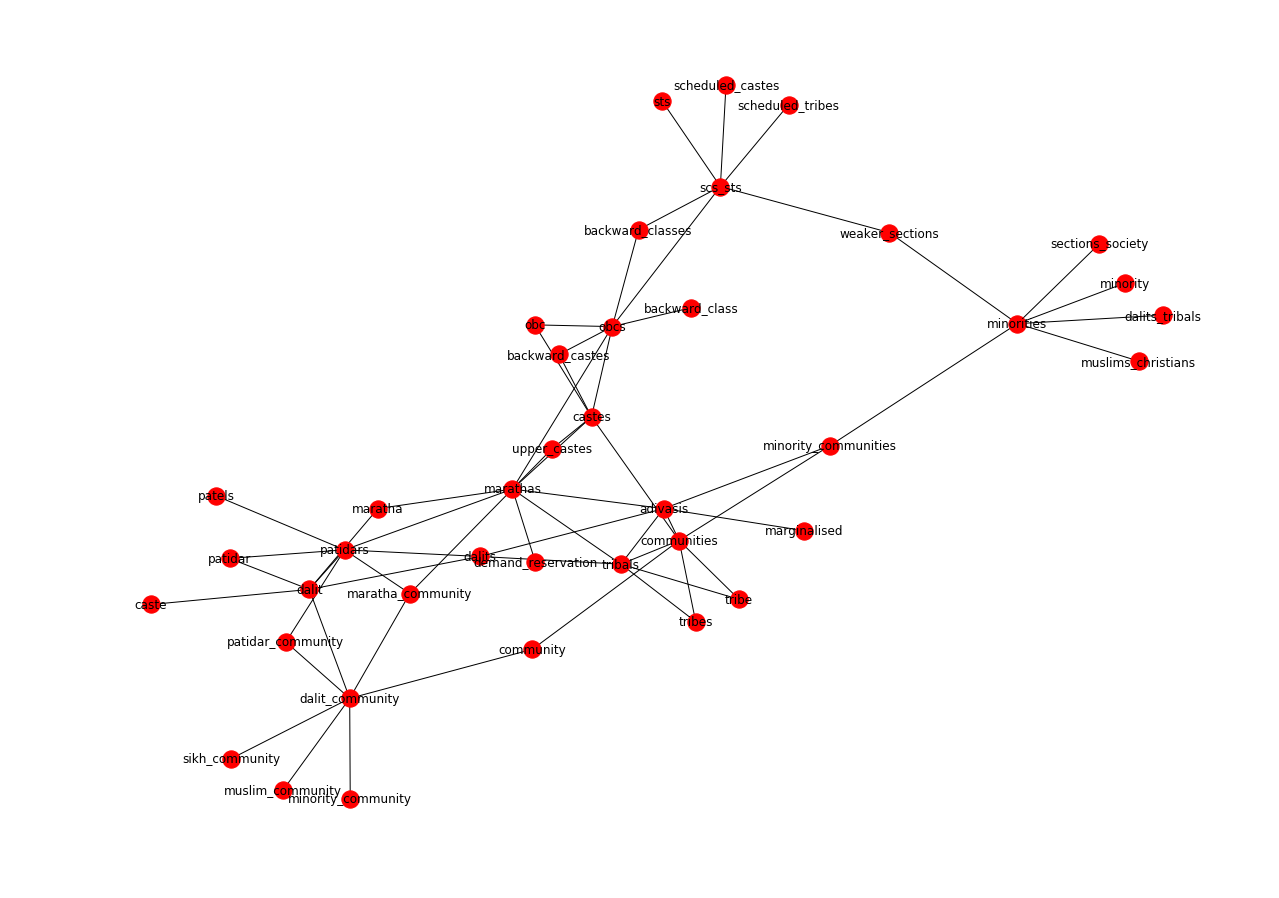

TypeError: array([ 1.]) is not JSON serializable

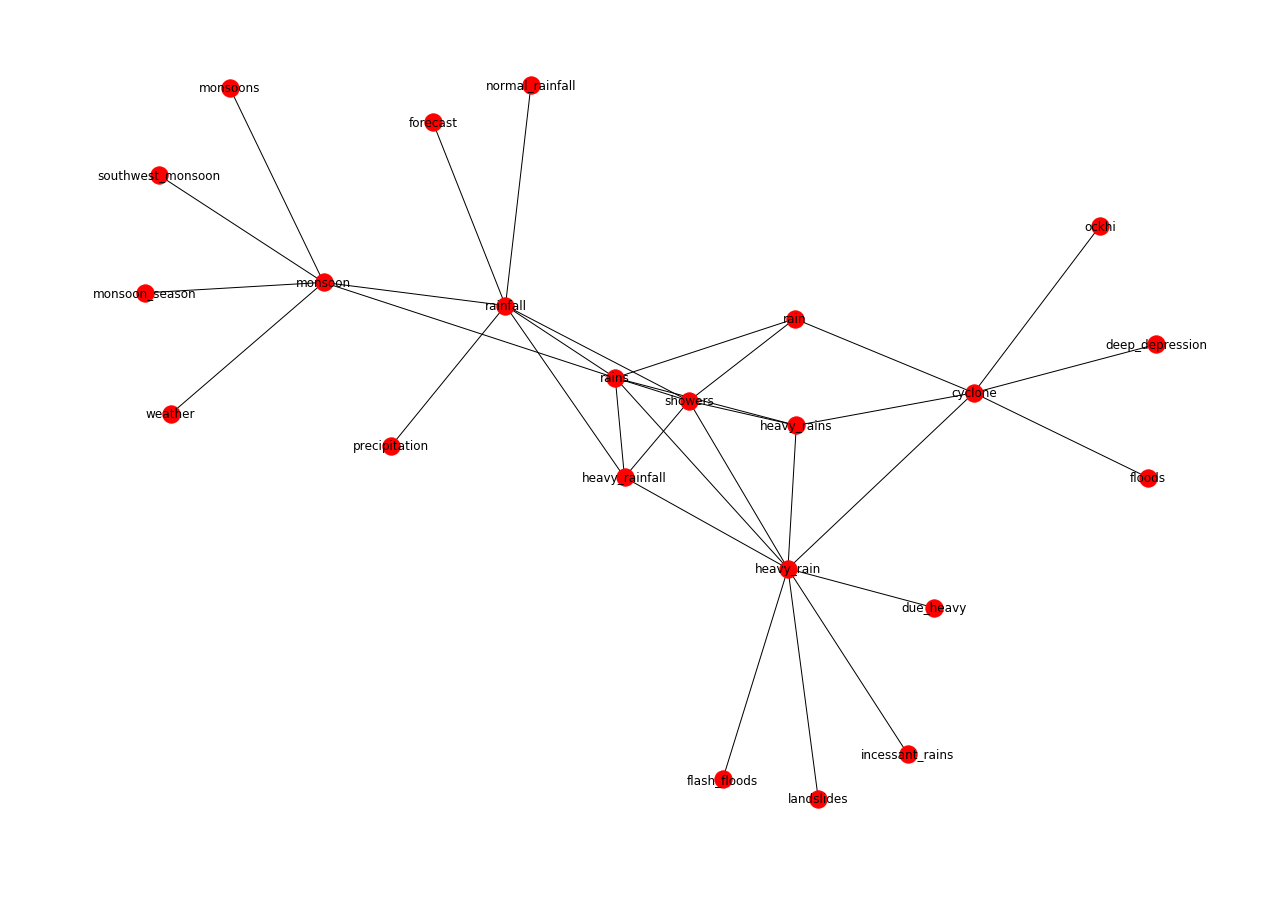

TypeError: array([ 1.]) is not JSON serializable

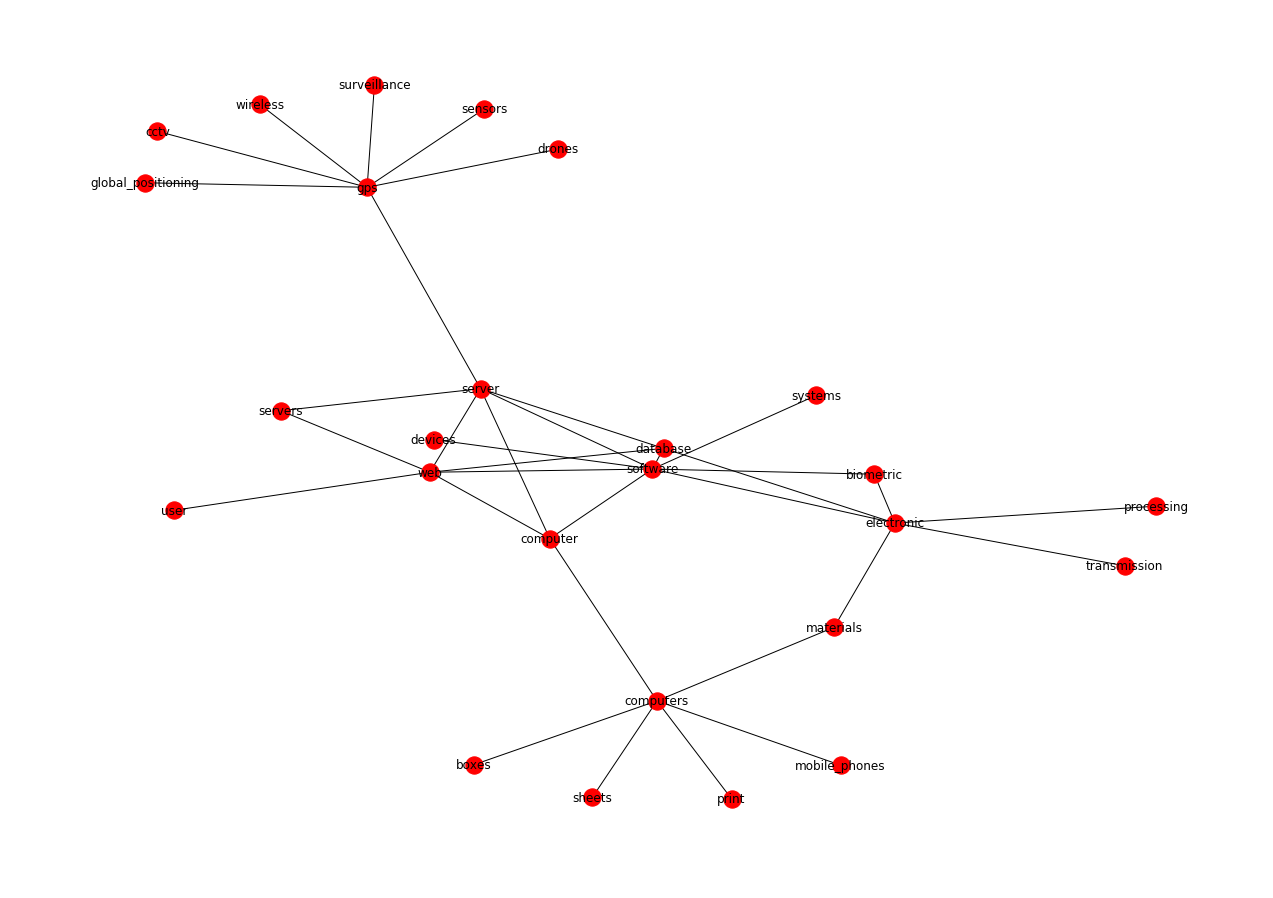

In [56]:
for gt1 in topics:
    nx.draw(gt1, with_labels=True)
    plt.show()

In [16]:
cliques4 = [x for x in nx.clique.find_cliques(g1) if len(x)==4]
nodes = set(n for clq in cliques3 for n in clq)
h4 = g1.subgraph(nodes3)
len(nodes3)
#nodes4 = 

NameError: name 'cliques3' is not defined

In [17]:
nx.draw(h4, with_labels=True)
plt.show()

NameError: name 'h4' is not defined

In [18]:
cliques3 = [x for x in nx.clique.find_cliques(g1) if len(x)==3]
nodes3 = set(n for clq in cliques3 for n in clq)
h3 = g1.subgraph(nodes3)
len(nodes3)

34

TypeError: array([ 1.]) is not JSON serializable

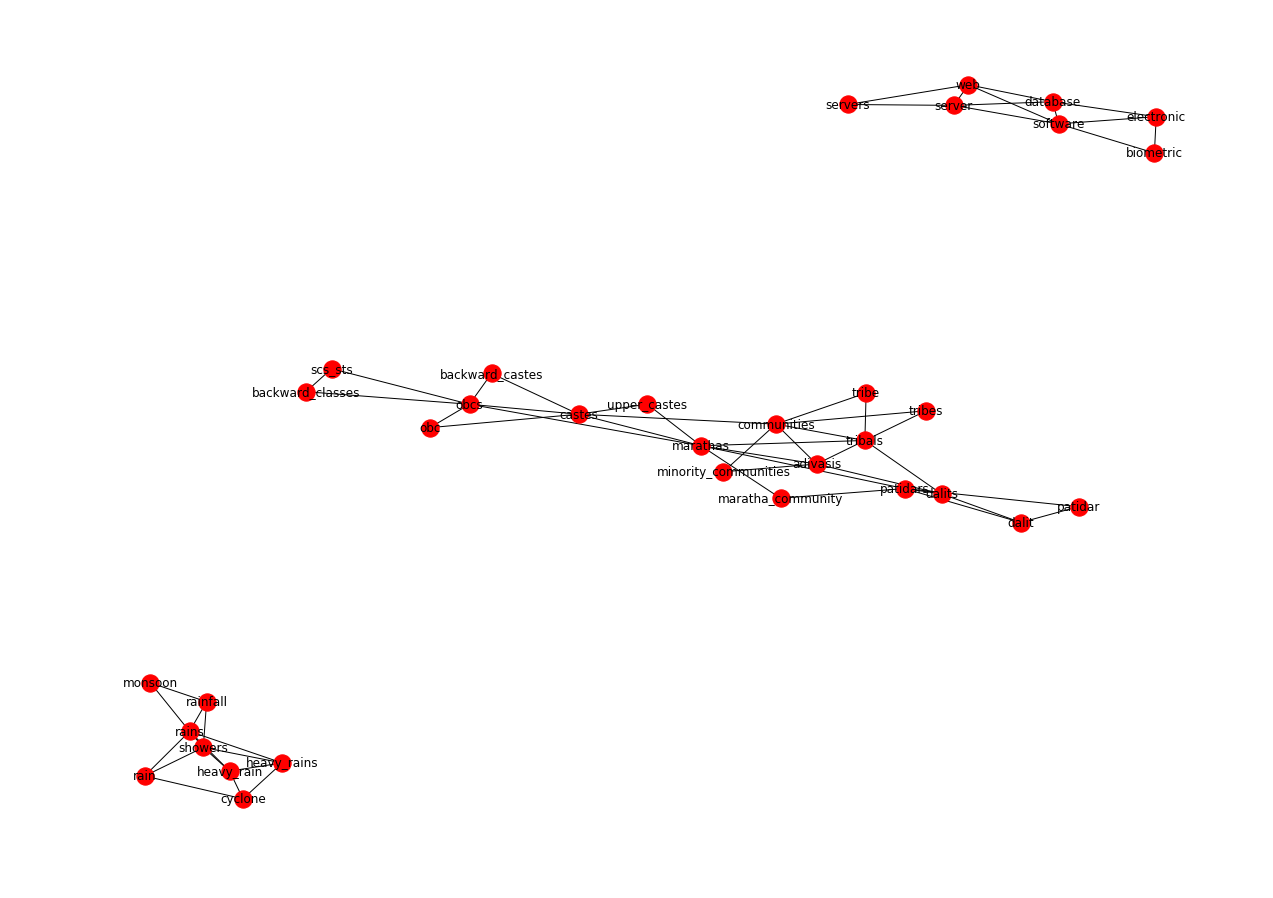

In [19]:
nx.draw(h3, with_labels=True)
mpld3.show()
#plt.show()